# 이커머스 데이터를 활용한 데이터 분석

## 01. 데이터 소개 및 분석프로세스 수립

캐글에서 제공하는 [이커머스 데이터](https://www.kaggle.com/datasets/carrie1/ecommerce-data) 를 활용해서 데이터 분석을 진행해 보겠습니다.

주요 분석 목표는 아래와 같습니다.

```
데이터 내 고객 주문 데이터 특징 확인하기
실적이 우수한 제품 확인하기
우수 고객 특징 확인
RFM 분석을 통한 마케팅 기획
Retention 분석
```


## 02. 데이터 탐색 및 전처리

### 0. 데이터 불러오기

* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [1]:
# 한글 깨짐 현상 해결
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm
# from matplotlib import pyplot as plt

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

In [2]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import pandas as pd
import numpy as np 
import seaborn as sns

from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from collections import Counter
from datetime import datetime

import squarify

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive

drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [5]:
df = pd.read_csv('/content/MyDrive/MyDrive/data.csv',  encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### **데이터 탐색 및 전처리**

In [6]:
# 데이터 형태
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df['CustomerID'] = df['CustomerID'].dropna().astype(int)

In [10]:
df[['InvoiceDate']].head()

,InvoiceDate
0,12/1/2010 8:26
1,12/1/2010 8:26
2,12/1/2010 8:26
3,12/1/2010 8:26
4,12/1/2010 8:26


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df[['InvoiceDate']].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


#### 결측값

In [12]:
def missing_df(df):
  columns_with_null = df.columns[df.isna().sum()>0]
  null_pct = (df[columns_with_null].isna().sum()/ df.shape[0] * 100).sort_values(ascending=False)
  try:
    plt.figure(figsize=(10, 6))
    sns.barplot(y = null_pct.index, x = null_pct, orient='h', palette='PuBu')
    plt.title('데이터 내 Column 별 결측치 비율 (%)', fontsize=16)
  except:
    print('데이터 내 결측값이 없습니다.')

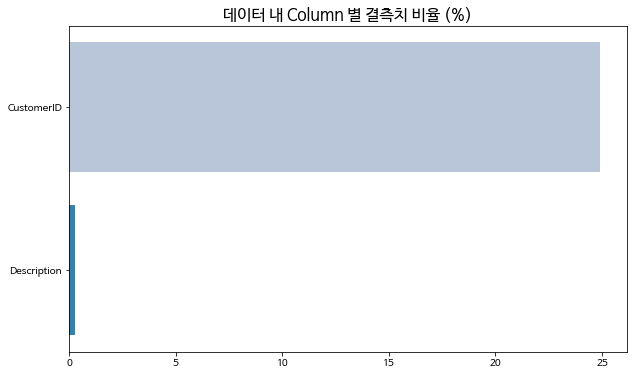

In [13]:
missing_df(df)

> `CustomerID`는 결측치를 대체할 방법이 없다고 생각해서 제거해주겠습니다.

In [14]:
print('CustomerID null 값 제거 전 데이터 shape :', df.shape)
df.dropna(subset = ['CustomerID'], inplace=True)
print('CustomerID null 값 제거 후 데이터 shape :', df.shape)

CustomerID null 값 제거 전 데이터 shape : (541909, 8)
CustomerID null 값 제거 후 데이터 shape : (406829, 8)


In [15]:
missing_df(df)

데이터 내 결측값이 없습니다.


<Figure size 720x432 with 0 Axes>

#### 중복값

In [16]:
df['InvoiceNo'].duplicated().value_counts()

True     384639
False     22190
Name: InvoiceNo, dtype: int64

In [17]:
df['Country'].duplicated().value_counts()

True     406792
False        37
Name: Country, dtype: int64

In [18]:
print('전체 데이터 내 중복된 항목 수:', len(df[df.duplicated()]))

전체 데이터 내 중복된 항목 수: 5225


> 중복된 데이터는 제거해주겠습니다.

In [19]:
print('중복 값 제거 전 데이터 shape :', df.shape)
df.drop_duplicates(inplace=True)
print('중복 값 제거 후 데이터 shape :', df.shape)

중복 값 제거 전 데이터 shape : (406829, 8)
중복 값 제거 후 데이터 shape : (401604, 8)


In [20]:
def plot_unique_data(df):
  columns_with_unique = df.columns[df.nunique() > 1]
  unique_pct = (df[columns_with_unique].nunique() / df.shape[0] * 100).sort_values(ascending=False)
  try:
    plt.figure(figsize=(10, 6))
    sns.barplot(y = unique_pct.index, x = unique_pct, orient='h', palette='PuBu')
    plt.title('데이터 내 column 별 유니크 값 비율 (%)', fontsize=16)
  except:
    print('데이터 내 유니크 값 개수가 1 이상인 column이 없습니다.')

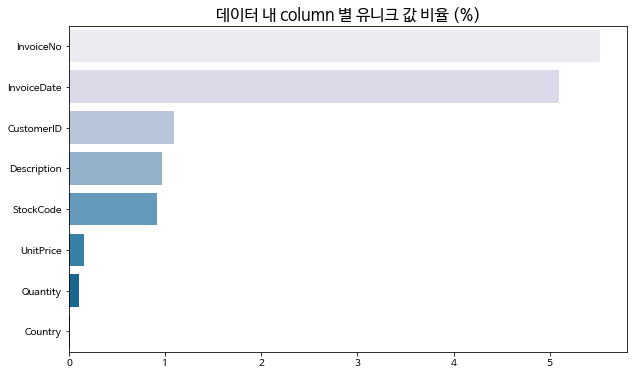

In [21]:
plot_unique_data(df)

### **고객 주문 데이터 특징 확인**

In [22]:
pd.DataFrame([{'Customers': len(df['CustomerID'].value_counts()),
              'Transactions': len(df['InvoiceNo'].value_counts()),
              'Products': len(df['StockCode'].value_counts())}],
               columns = ['Customers', 'Transactions' , 'Products'] ,index=['Quantity'])

,Customers,Transactions,Products
Quantity,4372,22190,3684


In [23]:
customer = df.groupby(['CustomerID', 'InvoiceNo'])['InvoiceDate'].count().reset_index()
customer = customer.rename(columns = {'InvoiceDate' : 'Number of products'})
customer

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,50
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


`InvoiceNo` column 내 C라는 값이 존재합니다. 특징을 확인해보겠습니다.

In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [25]:
customer[customer['InvoiceNo'].str.contains('C')]

,CustomerID,InvoiceNo,Number of products
1,12346.0,C541433,1
23,12352.0,C545329,2
24,12352.0,C545330,1
25,12352.0,C547388,7
39,12359.0,C549955,2
...,...,...,...
22159,18274.0,C577832,11
22161,18276.0,C577386,1
22162,18276.0,C577390,1
22164,18277.0,C542086,1


In [26]:
customer[customer['CustomerID'] == 12346]

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1


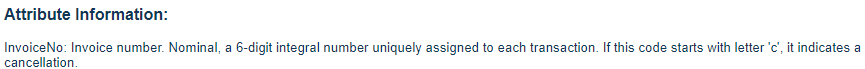

`InvoiceNo` 데이터에 c가 포함되어 있으면 취소된 상품을 의미합니다.

해당 열이 주문 취소인지를 나타내는 column을 생성하겠습니다.

In [27]:
customer['canceled_order'] = customer['InvoiceNo'].apply(lambda x: int('C' in x))
customer

,CustomerID,InvoiceNo,Number of products,canceled_order
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [28]:
customer['canceled_order'].value_counts()

0    18536
1     3654
Name: canceled_order, dtype: int64

주문 취소된 항목 삭제한 새로운 컬럼을 만들겠습니다.

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
df_copy = df.copy()
df_copy['Canceled quantity'] = 0

should_be_removed = []
doubtful = []

for index, row in df.iterrows():
  # 주문 수량이 0보다 크거나 할인인 경우 pass (할인 품목은 취소가 불가):
  if row['Quantity'] > 0 or row['Description'] == 'Discount':
    continue
  
  # 주문일이 더 빠른 경우
  df_test = df[(df['CustomerID'] == row['CustomerID']) &
               (df['StockCode'] == row['StockCode']) &
               (df['InvoiceDate'] < row['InvoiceDate']) &
               (df['Quantity'] > 0)].copy()

  # 주문일이 더 빠른데 수량이 0보다 큰 경우가 없는 경우
  if df_test.shape[0] == 0:
    doubtful.append(index)

  # 주문일이 더 빠른데 수량이 0보다 큰 경우가 1개인 경우
  elif df_test.shape[0] == 1:
    order_index = df_test.index[0]
    #취소된 수량에 대한 컬럼을 새로 생성
    df_copy.loc[order_index, 'Canceled quantity'] = -row['Quantity']
    should_be_removed.append(index)
  
  # 주문일이 더 빠르고 수량이 0보다 큰 경우가 2개 이상인 경우
  elif df_test.shape[0] > 1:
    df_test.sort_index(ascending=False, inplace=True)

    for ind, value in df_test.iterrows():
      if value['Quantity'] < -row['Quantity']:
        continue
      df_copy.loc[ind, 'Canceled quantity'] = -row['Quantity']
      should_be_removed.append(index)
      break

In [31]:
print(f'제거해야 할 데이터 개수: {len(should_be_removed)}')
print(f'의심스러운 데이터 개수: {len(doubtful)}')

제거해야 할 데이터 개수: 7521
의심스러운 데이터 개수: 1226


In [32]:
print('데이터 제거 전 shape:', df_copy.shape)
df_copy.drop(should_be_removed + doubtful, inplace=True)
print('데이터 제거 후 shape:', df_copy.shape)

데이터 제거 전 shape: (401604, 9)
데이터 제거 후 shape: (392857, 9)


#### StockCode

In [33]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


`StockCode` 내 알파벳의 의미를 확인해보겠습니다.

In [34]:
alphabet = df_copy[df_copy['StockCode'].str.contains(r'^[a-zA-Z]+')]['StockCode'].unique()
alphabet

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [35]:
df_copy['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [36]:
df_copy[df_copy['StockCode'] == 'POST']['Description'].unique()[0]

'POSTAGE'

In [37]:
df_copy[df_copy['StockCode'] == 'D']['Description'].unique()[0]

'Discount'

> `StockCode`와 `Description`의 관계

In [38]:
for code in alphabet:
    print("{:<15} -> {}".format(code, df_copy[df_copy['StockCode'] == code]['Description'].unique()[0])) 

POST            -> POSTAGE
D               -> Discount
C2              -> CARRIAGE
M               -> Manual
BANK CHARGES    -> Bank Charges
PADS            -> PADS TO MATCH ALL CUSHIONS
DOT             -> DOTCOM POSTAGE


> 총 가격 column 생성

In [39]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [40]:
df_copy['Total price'] = df_copy['UnitPrice'] * (df_copy['Quantity'] - df_copy['Canceled quantity'])

In [41]:
df_copy[df_copy['Canceled quantity'] > 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,12,219.00
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom,2,49.56
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,1,12.65
99,536378,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom,27,-1.65
139,536381,22719,GUMBALL MONOCHROME COAT RACK,36,2010-12-01 09:41:00,1.06,15311.0,United Kingdom,3,34.98


#### Country

In [42]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [43]:
country = df_copy[['CustomerID', 'InvoiceNo','Country']].groupby(['CustomerID','InvoiceNo','Country']).count().reset_index()
country.head()

,CustomerID,InvoiceNo,Country
0,12346.0,541431,United Kingdom
1,12347.0,537626,Iceland
2,12347.0,542237,Iceland
3,12347.0,549222,Iceland
4,12347.0,556201,Iceland


Text(0.5, 1.0, '상품 판매량 TOP 10 국가')

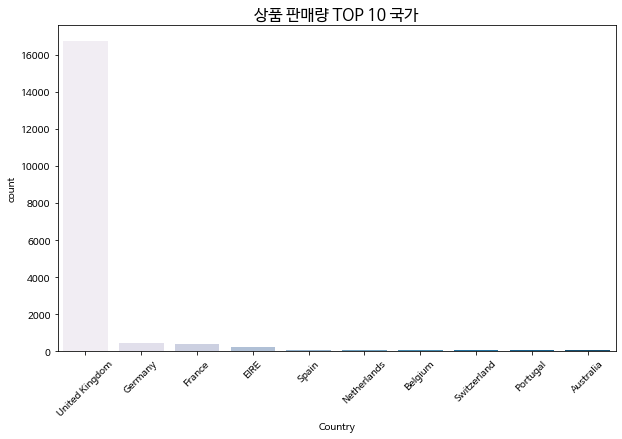

In [44]:
plt.figure(figsize=(10,6))
sns.countplot('Country', data=country, order = df_copy.Country.value_counts().head(10).index, palette='PuBu')
plt.xticks(rotation=45)
plt.title('상품 판매량 TOP 10 국가', fontsize=16)

주문 대다수가 `United Kingdom`에 몰려있습니다.

In [45]:
country_sum = df_copy.groupby('Country').sum()['Total price'].sort_values(ascending=False)[:10].reset_index()
country_sum

,Country,Total price
0,United Kingdom,6828858.554
1,Netherlands,284731.140
2,EIRE,254839.400
3,Germany,223435.730
4,France,196763.140
5,Australia,136950.250
6,Spain,57616.900
7,Switzerland,55743.750
8,Belgium,40891.040
9,Sweden,37781.910


Text(0.5, 1.0, '상품 총 판매액 TOP 10 국가')

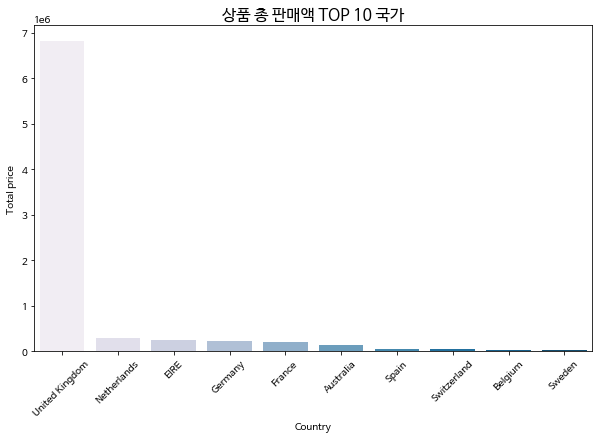

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Total price', x= 'Country', data=country_sum, order = country_sum.Country.value_counts().head(10).index, palette='PuBu')
plt.xticks(rotation=45)
plt.title('상품 총 판매액 TOP 10 국가', fontsize=16)

데이터 내 압도적인 판매량을 기록한 `United Kingdom`가 역시 판매액 또한 제일 높습니다.

#### 전체 데이터 매출

In [47]:
print('데이터 내 전체 매출:', round(df_copy['Total price'].sum()))

데이터 내 전체 매출: 8384108


#### 월별 매출

In [48]:
def month(date):
  month = str(date.month)
  if date.month < 10:
    month = '0' + month
  return str(date.year) + month

In [49]:
df_copy['InvoiceMonth'] = df_copy['InvoiceDate'].apply(month)

In [50]:
month_sum = df_copy.groupby('InvoiceMonth').sum()['Total price'].reset_index()
month_sum

,InvoiceMonth,Total price
0,201012,555638.780
1,201101,458783.010
2,201102,439415.630
3,201103,582519.270
4,201104,454117.051
5,201105,662380.970
6,201106,606949.300
7,201107,586648.361
8,201108,621753.660
9,201109,939695.512


Text(0.5, 1.0, '월별 매출')

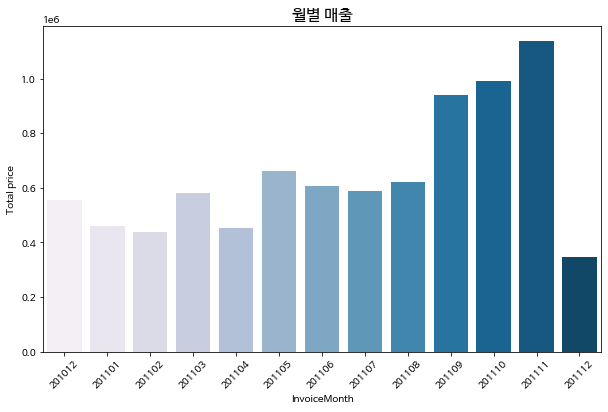

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Total price', x= 'InvoiceMonth', data=month_sum,  palette='PuBu')
plt.xticks(rotation=45)
plt.title('월별 매출', fontsize=16)

> 가장 우수한 매출을 기록한 시기는 2011년 10월과 11월로 확인됐습니다.

In [52]:
df_copy['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

데이터 내 2011년 12월의 마지막 날이 9일임을 감안하면,

 12월 말일까지 데이터가 있었다면 12월 또한 매출이 높았을 수도 있겠습니다.

#### 요일별 매출

In [53]:
df_copy['InvoiceWeekday'] = df_copy['InvoiceDate'].apply(lambda x: x.dayofweek)

In [54]:
weekday_sum = df_copy.groupby('InvoiceWeekday').sum()['Total price'].reset_index()
weekday_sum['InvoiceWeekday'] = weekday_sum['InvoiceWeekday'].replace({0: 'MON', 1: 'TUE', 2: 'WED',
                                                                       3: 'THU', 4: 'FRI', 5: 'SAT', 6: 'SUN'})
weekday_sum

,InvoiceWeekday,Total price
0,MON,1330345.381
1,TUE,1574060.491
2,WED,1558533.610
3,THU,1910758.540
4,FRI,1237678.011
5,SUN,772732.141


Text(0.5, 1.0, '요일별 매출')

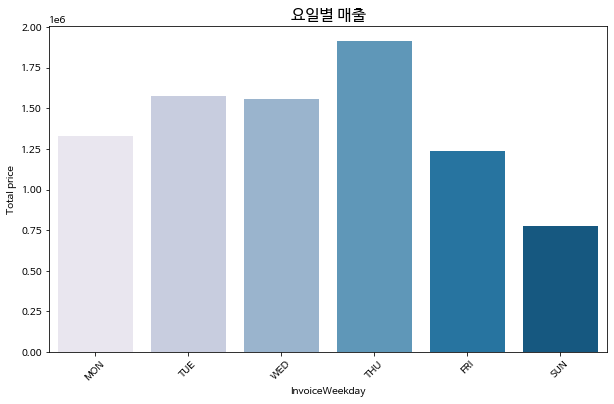

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Total price', x= 'InvoiceWeekday', data=weekday_sum,  palette='PuBu')
plt.xticks(rotation=45)
plt.title('요일별 매출', fontsize=16)

데이터 특성 상 **토요일**에는 전혀 매출 기록이 없으며, **목요일**이 가장 큰 매출을 기록했습니다.

#### 시간대별 매출

In [56]:
df_copy['InvoiceHour'] = df_copy['InvoiceDate'].apply(lambda x: x.hour)

In [57]:
hourly_sum = df_copy.groupby('InvoiceHour').sum()['Total price'].reset_index()
hourly_sum

,InvoiceHour,Total price
0,6,-211.750
1,7,30915.710
2,8,277976.360
3,9,660431.031
4,10,1152258.771
5,11,1079306.010
6,12,1324510.840
7,13,1149013.470
8,14,957197.271
9,15,905893.790


Text(0.5, 1.0, '시간대별 매출')

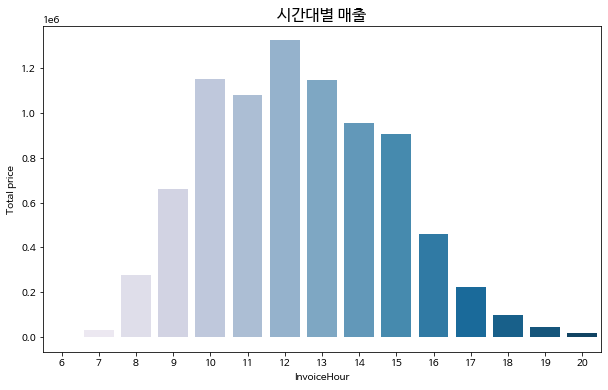

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'Total price', x= 'InvoiceHour', data=hourly_sum,  palette='PuBu')
plt.title('시간대별 매출', fontsize=16)

정오 주변 시간대가 매출이 높음을 알 수 있습니다.

In [59]:
df_copy[df_copy['InvoiceHour']==6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price,InvoiceMonth,InvoiceWeekday,InvoiceHour
304661,C563592,D,Discount,-1,2011-08-18 06:12:00,9.60,16029.0,United Kingdom,0,-9.60,201108,3,6
304662,C563593,D,Discount,-1,2011-08-18 06:13:00,206.40,14646.0,Netherlands,0,-206.40,201108,3,6
304667,563597,22852,DOG BOWL VINTAGE CREAM,1,2011-08-18 06:20:00,4.25,14305.0,United Kingdom,0,4.25,201108,3,6


6시 평균 매출이 음수였던 이유는 총 주문 3건중 2건이 **취소주문**이었기 때문입니다.

#### So what?

> 그렇다면 해당 매출 데이터를 통해 어떤 의사결정을 할 수 있을까요?

##### **요일** 관련
1. 매출이 가장 저조한 **일요일**에 주문할 경우 구매 유도를 위한 배송비 면제 혜택 제공
2. 매출이 가장 높은 **목요일**에 주문할 경우 추가 할인 혜택 제공

##### **시간대** 관련
1. 주문량이 **가장 높은 시간대**에 주문시 쿠폰 제공
2. 주문량이 현저히 낮은 **15시** 이후 주문량 증가를 위해 해당 시간대에 `Hot deal` 아이템 프로모션 진행

### **실적이 우수한 제품 분석**

#### 가장 많이 팔린 제품

In [60]:
top10_items = df_copy.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10].reset_index()
top10_items

,StockCode,Quantity
0,23843,80995
1,23166,77916
2,84077,54319
3,22197,49160
4,85099B,45974
5,85123A,36763
6,84879,35263
7,21212,33670
8,23084,27153
9,22492,26076


#### 가장 높은 매출을 기록한 제품

In [61]:
top10_sales_items = df_copy.groupby('StockCode').sum()['Total price'].sort_values(ascending=False)[:10].reset_index()
top10_sales_items

,StockCode,Total price
0,22423,134485.30
1,85123A,93936.30
2,85099B,83094.73
3,POST,76079.01
4,47566,67637.63
5,84879,56336.97
6,23084,51048.11
7,79321,45915.41
8,22086,41645.48
9,21137,38997.41


> 판매량 TOP 10 제품과 매출 TOP 10 제품

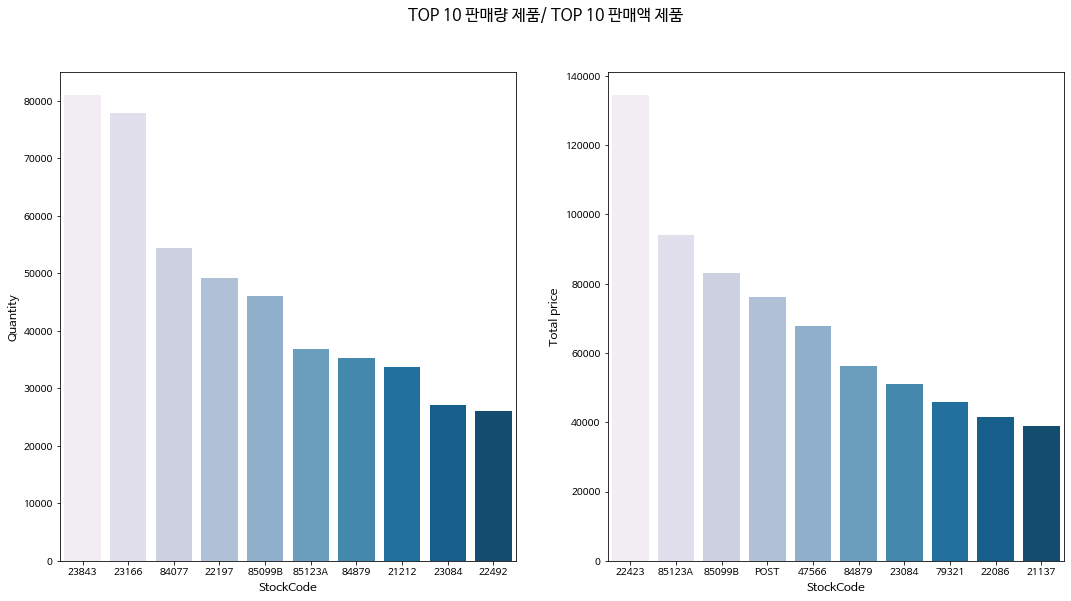

In [62]:
items_data = [top10_items, top10_sales_items]
col = ['Quantity', 'Total price']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

for idx, data in enumerate(items_data):
  sns.barplot(y = col[idx], x= 'StockCode', data=data,  palette='PuBu', ax=axes[idx])
  axes[idx].set_xlabel('StockCode', fontsize=12)
  axes[idx].set_ylabel(col[idx], fontsize=12)
  plt.suptitle('TOP 10 판매량 제품/ TOP 10 판매액 제품', fontsize=16)

In [63]:
print(f'가장 많이 판매된 제품:', df_copy[df_copy['StockCode'] == '23843']['Description'].values[0])

가장 많이 판매된 제품: PAPER CRAFT , LITTLE BIRDIE


In [64]:
print(f'가장 높은 판매액을 기록한 제품:', df_copy[df_copy['StockCode'] == '22423']['Description'].values[0])

가장 높은 판매액을 기록한 제품: REGENCY CAKESTAND 3 TIER


가장 많이 팔린 제품은 `23843`. 가장 많은 매출을 기록한 제품은 `22423` 제품이며,

그 중 판매량 대비 판매액이 높은 제품은 `85123A`, `85099B` 제품이 있습니다.

In [65]:
items = df_copy['Description'].value_counts().head(50).to_frame()
items.index[:10]

Index(['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER',
       'JUMBO BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT',
       'SET OF 3 CAKE TINS PANTRY DESIGN ', 'POSTAGE',
       'LUNCH BAG  BLACK SKULL.', 'PACK OF 72 RETROSPOT CAKE CASES'],
      dtype='object')

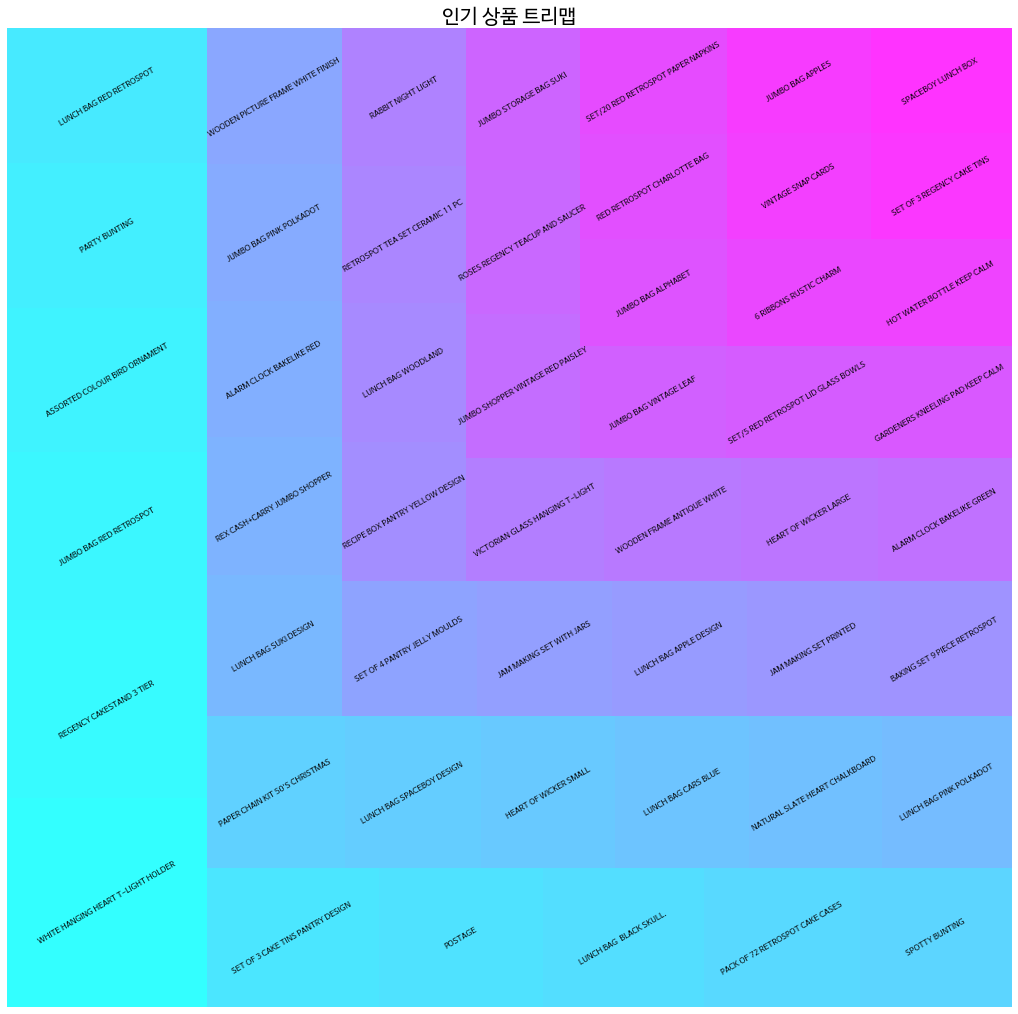

In [66]:
plt.figure(figsize=(18, 18))

color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes= items.values, label = items.index, color=color, text_kwargs={'fontsize': 8, 'rotation': 30}, alpha=0.8)
plt.title('인기 상품 트리맵', fontsize = 20)
plt.axis('off')
plt.show()

### **우수 고객 특징 확인**

In [67]:
df_copy['CustomerID'] = df_copy['CustomerID'].astype(int)

> 구매량 기준 TOP10 고객

In [68]:
customer = df_copy.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False).reset_index()[:10]
customer

,CustomerID,Quantity
0,17841,7676
1,14911,5673
2,14096,5111
3,12748,4414
4,14606,2678
5,15311,2366
6,14646,2081
7,13089,1814
8,13263,1667
9,14298,1637


> 구매액 기준 TOP10 고객

In [69]:
customer_sales = df_copy.groupby('CustomerID').sum()['Total price'].sort_values(ascending=False).reset_index()[:10]
customer_sales

,CustomerID,Total price
0,14646,279558.62
1,18102,259657.30
2,17450,193332.83
3,14911,136140.74
4,12415,123638.18
5,14156,114370.20
6,17511,88353.14
7,16029,70156.64
8,16684,65892.08
9,14096,65164.79


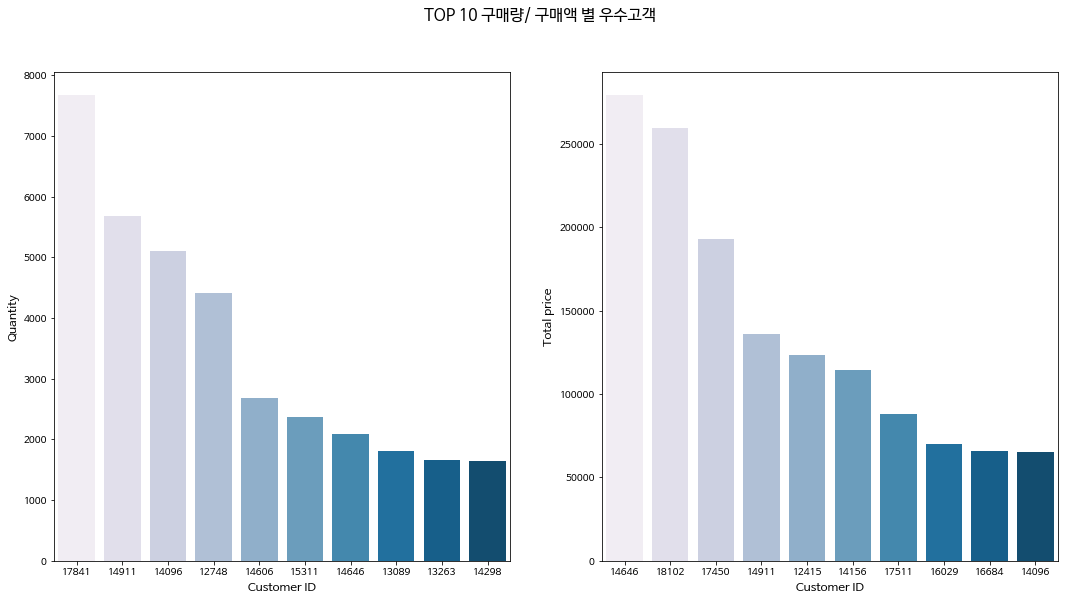

In [70]:
customer_data = [customer, customer_sales]
col = ['Quantity', 'Total price']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

for idx, data in enumerate(customer_data):
  sns.barplot(y = col[idx], x= 'CustomerID', data=data, palette='PuBu', ax=axes[idx], order=data.sort_values(col[idx], ascending=False).CustomerID)
  axes[idx].set_xlabel('Customer ID', fontsize=12)
  axes[idx].set_ylabel(col[idx], fontsize=12)
  plt.suptitle('TOP 10 구매량/ 구매액 별 우수고객', fontsize=16)

**판매량 우수고객** 중 상대적으로 하위권인 고객인 `14646` 고객은 구매액 별로 필터링했을 경우 **최우수 고객**입니다.


### **RFM 분석**

- Recency: 고객이 최근에 구입을 했는가?

- Frequency: 고객이 얼마나 빈번하게 상품을 구입했는가?

- Monetary: 고객이 구입했던 총 금액은 얼마인가?

> RFM 분석을 통해 

1. **VIP 고객 한정 프로모션**에 해당하는 고객층

2. **휴면 고객 복귀 이벤트**에 해당하는 고객층을  알아보겠습니다.

In [71]:
transactions = df_copy.groupby(['CustomerID']).agg({
    'Total price':'sum',                     # 지불 총 비용
    'InvoiceDate':'max',                     # 가장 최근에 구매한 날짜
    'Quantity':'count'}).reset_index()       # 얼마나 많이 구매했는가

transactions = transactions.sort_values('Quantity', ascending=False).reset_index(drop=True)
transactions

,CustomerID,Total price,InvoiceDate,Quantity
0,17841,39928.46,2011-12-08 12:07:00,7676
1,14911,136140.74,2011-12-08 15:54:00,5673
2,14096,65164.79,2011-12-05 17:17:00,5111
3,12748,31176.11,2011-12-09 12:20:00,4414
4,14606,11786.90,2011-12-08 19:28:00,2678
...,...,...,...,...
4334,17846,2033.10,2011-09-15 15:20:00,1
4335,13256,0.00,2011-11-25 15:57:00,1
4336,13270,590.00,2010-12-08 14:53:00,1
4337,15562,134.55,2010-12-23 09:55:00,1


In [72]:
transactions = transactions.rename(columns = {'InvoiceDate' : 'Last purchase', 'Quantity': 'Frequency'})
transactions

,CustomerID,Total price,Last purchase,Frequency
0,17841,39928.46,2011-12-08 12:07:00,7676
1,14911,136140.74,2011-12-08 15:54:00,5673
2,14096,65164.79,2011-12-05 17:17:00,5111
3,12748,31176.11,2011-12-09 12:20:00,4414
4,14606,11786.90,2011-12-08 19:28:00,2678
...,...,...,...,...
4334,17846,2033.10,2011-09-15 15:20:00,1
4335,13256,0.00,2011-11-25 15:57:00,1
4336,13270,590.00,2010-12-08 14:53:00,1
4337,15562,134.55,2010-12-23 09:55:00,1


In [73]:
latestdate = transactions['Last purchase'].max()
latestdate

Timestamp('2011-12-09 12:50:00')

In [74]:
transactions['Recency'] = transactions['Last purchase'].apply(lambda x: (latestdate - x).days)
transactions['Recency']

0         1
1         0
2         3
3         0
4         0
       ... 
4334     84
4335     13
4336    365
4337    351
4338    325
Name: Recency, Length: 4339, dtype: int64

In [75]:
transactions['Monetary'] = transactions['Total price']
transactions = transactions.drop(['Total price'], axis=1)
transactions = transactions.drop(['Last purchase'], axis=1)
transactions = transactions[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
transactions

,CustomerID,Recency,Frequency,Monetary
0,17841,1,7676,39928.46
1,14911,0,5673,136140.74
2,14096,3,5111,65164.79
3,12748,0,4414,31176.11
4,14606,0,2678,11786.90
...,...,...,...,...
4334,17846,84,1,2033.10
4335,13256,13,1,0.00
4336,13270,365,1,590.00
4337,15562,351,1,134.55


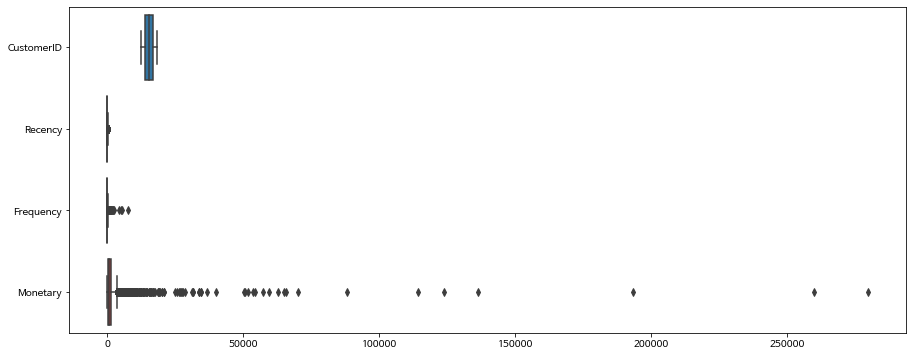

In [76]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = transactions, orient = 'h')
plt.show()

`RFM` 분석 전 Outlier 제거를 진행해주겠습니다.

In [77]:
def detect_outliers(df, features):
    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        
        IQR = Q3 - Q1

        # outlier step
        upperfence = Q3 + (1.5 * IQR)
        lowerfence = Q1 - (1.5 * IQR)

        # 이상치 컬럼 리스트
        outlier_list_col = df[(df[col] < lowerfence) | (df[col] > upperfence)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)        
    return outlier_indices

feat = ['Recency', 'Frequency', 'Monetary']

Outliers_to_drop = detect_outliers(transactions, feat)

print(len(Outliers_to_drop))

719


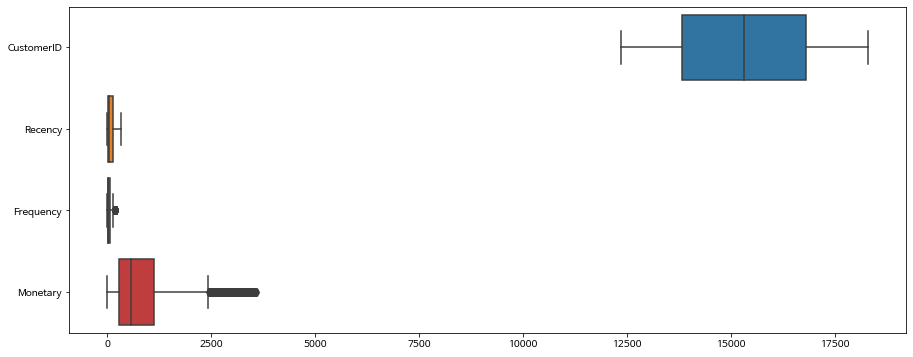

In [78]:
transactions = transactions.drop(Outliers_to_drop)

plt.figure(figsize = (15, 6))
sns.boxplot(data = transactions, orient = 'h')
plt.show()

In [79]:
transactions = transactions[transactions['Monetary'] > 0]
transactions.describe()

,CustomerID,Recency,Frequency,Monetary
count,3608.000000,3608.000000,3608.000000,3608.000000
mean,15314.126109,90.726164,51.023282,837.343114
std,1708.626943,89.436224,47.059047,773.721353
min,12348.000000,0.000000,1.000000,2.900000
25%,13836.500000,21.000000,16.000000,280.812500
50%,15310.000000,56.000000,34.000000,571.700000
75%,16789.250000,143.000000,73.000000,1139.850000
max,18287.000000,326.000000,219.000000,3595.480000


5분위로 고객 등급을 나눠 보겠습니다.

In [80]:
quintiles = transactions[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 17.0, 0.4: 39.0, 0.6: 74.0, 0.8: 175.60000000000036},
 'Frequency': {0.2: 13.0, 0.4: 26.0, 0.6: 46.0, 0.8: 86.0},
 'Monetary': {0.2: 226.844,
  0.4: 417.50800000000004,
  0.6: 724.1839999999999,
  0.8: 1353.1980000000003}}

In [81]:
# recency '얼마나 최근에 구매하였는가' 이기 때문에 낮을수록 높은 점수

def r_score(x):
  if x <= quintiles['Recency'][.2]:
    return 5
  elif x <= quintiles['Recency'][.4]:
    return 4
  elif x <= quintiles['Recency'][.6]:
    return 3
  elif x <= quintiles['Recency'][.8]:
    return 2
  else:
    return 1

# 나머지 frequency, monetary는 얼마나 자주 방문했는가, 얼마나 많은 돈을 썼는가 이므로 높을수록 높은 점수
def fm_score(x, c):
  if x <= quintiles[c][.2]:
    return 1
  elif x <= quintiles[c][.4]:
    return 2
  elif x <= quintiles[c][.6]:
    return 3
  elif x <= quintiles[c][.8]:
    return 4
  else:
    return 5

In [82]:
transactions['R'] = transactions['Recency'].apply(lambda x: r_score(x))
transactions['F'] = transactions['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
transactions['M'] = transactions['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [83]:
transactions['RFM score'] = transactions['R'].map(str) + transactions['F'].map(str) + transactions['M'].map(str)
transactions.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM score
381,15531,7,219,1972.39,5,5,5,555
383,17861,2,219,2056.28,5,5,5,555
384,15351,11,219,1866.21,5,5,5,555
388,17673,1,218,1588.07,5,5,5,555
389,13527,33,217,2218.61,4,5,5,455


In [84]:
segt_map = {
    r'[1-2][1-2]': '최근 구매 없음/구매 횟수 적음',
    r'[1-2][3-4]': '최근 구매 없음/구매 횟수 보통',
    r'[1-2]5': '최근 구매 없음/구매 횟수 많음',
    r'3[1-2]': '비교적 최근 구매/구매 횟수 적음',
    r'33': '비교적 최근 구매/구매 횟수 보통',
    r'[3-4][4-5]': '최근에 구매함/구매 횟수 많음',
    r'41': '최근에 구매함/구매 횟수 적음',
    r'51': '최근에 구매함/구매 횟수 적음',
    r'[4-5][2-3]': '매우 최근에 구매함/구매 횟수 보통/프로모션대상',
    r'5[4-5]': '매우 최근에 구매함/구매 횟수 많음'
}

transactions['Segment'] = transactions['R'].map(str) + transactions['F'].map(str)
transactions['Segment'] = transactions['Segment'].replace(segt_map, regex=True)
transactions.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM score,Segment
381,15531,7,219,1972.39,5,5,5,555,매우 최근에 구매함/구매 횟수 많음
383,17861,2,219,2056.28,5,5,5,555,매우 최근에 구매함/구매 횟수 많음
384,15351,11,219,1866.21,5,5,5,555,매우 최근에 구매함/구매 횟수 많음
388,17673,1,218,1588.07,5,5,5,555,매우 최근에 구매함/구매 횟수 많음
389,13527,33,217,2218.61,4,5,5,455,최근에 구매함/구매 횟수 많음


#### VIP 프로모션 대상

Text(0.5, 1.0, '고객 등급 분포 (VIP 프로모션 대상)')

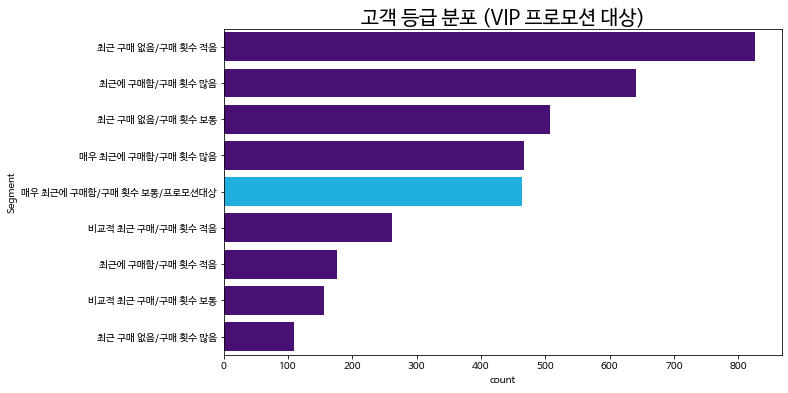

In [85]:
custom_palette = {}
vip = ['매우 최근에 구매함/구매 횟수 보통/프로모션대상']
for q in transactions['Segment'].unique():
    if q in vip:
        custom_palette[q] = 'deepskyblue'
    else:
        custom_palette[q] = 'indigo'

plt.figure(figsize=(10, 6))
sns.countplot(y = 'Segment', data = transactions, order = transactions.Segment.value_counts().index, palette= custom_palette)
plt.title('고객 등급 분포 (VIP 프로모션 대상)', fontsize=20)

In [86]:
vip_pct = round(len(transactions[transactions['Segment'] == '매우 최근에 구매함/구매 횟수 보통/프로모션대상']) / transactions.shape[0] * 100,2)
print(f'전체 고객 중 VIP 프로모션에 해당하는 고객의 비율은 {vip_pct} % 입니다.')

전체 고객 중 VIP 프로모션에 해당하는 고객의 비율은 12.86 % 입니다.


해당 조건에 해당하는 고객이 서비스를 사용할 경우

**'이번 달 n회의 추가 구매시 다음 달부터 추가 혜택이 주어집니다!'** 같은 팝업 메시지를 띄워볼 수 있겠습니다.

#### 휴면 고객 복귀 이벤트 대상

Text(0.5, 1.0, '고객 등급 분포 (휴면 고객 복귀 이벤트 대상)')

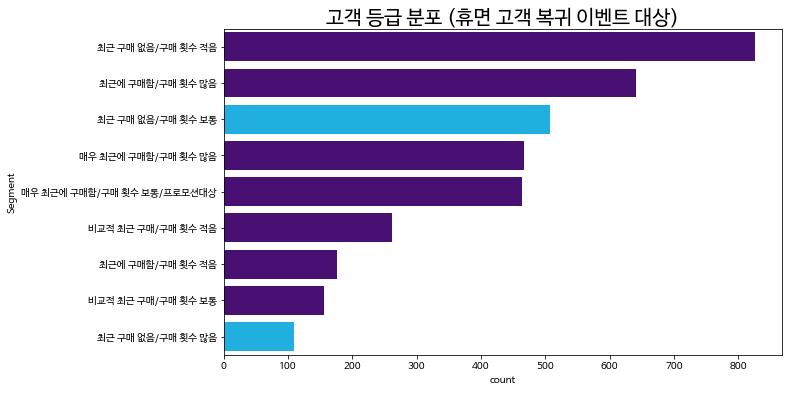

In [87]:
custom_palette2 = {}
dormant = ['최근 구매 없음/구매 횟수 많음', '최근 구매 없음/구매 횟수 보통']
for q in transactions['Segment'].unique():
    if q in dormant:
        custom_palette2[q] = 'deepskyblue'
    else:
        custom_palette2[q] = 'indigo'

plt.figure(figsize=(10, 6))
sns.countplot(y = 'Segment', data = transactions, order = transactions.Segment.value_counts().index, palette= custom_palette2)
plt.title('고객 등급 분포 (휴면 고객 복귀 이벤트 대상)', fontsize=20)

In [88]:
dormant_pct =   round((len(transactions[transactions['Segment'] == '최근 구매 없음/구매 횟수 많음']) + \
                    len(transactions[transactions['Segment'] == '최근 구매 없음/구매 횟수 보통'])) / transactions.shape[0] * 100,2)
print(f'전체 고객 중 휴면 고객 복귀 이벤트에 해당하는 고객의 비율은 {dormant_pct} % 입니다.')

전체 고객 중 휴면 고객 복귀 이벤트에 해당하는 고객의 비율은 17.07 % 입니다.


해당 조건에 해당하는 고객이 서비스를 사용할 경우

**'이번 달 최초 구매시 배송비 면제, 결제 금액 n원 달성시 추가 할인 혜택이 주어집니다!'** 같은 팝업 메시지를 띄워볼 수 있겠습니다.

### **Retention 분석**

우선 고객별로 최초로 구매한 달을 구하겠습니다.

In [89]:
def firstday_of_month(date):
  return datetime(date.year, date.month, 1)

df_copy['Month'] = df_copy['InvoiceDate'].apply(firstday_of_month)
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price,InvoiceMonth,InvoiceWeekday,InvoiceHour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,201012,2,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,201012,2,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,201012,2,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,201012,2,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,201012,2,8,2010-12-01


In [90]:
customer_month = df_copy.groupby('CustomerID')['Month']
df_copy['First purchase'] = customer_month.transform(np.min)
df_copy.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price,InvoiceMonth,InvoiceWeekday,InvoiceHour,Month,First purchase
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20,201112,4,12,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60,201112,4,12,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,201112,4,12,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,201112,4,12,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,0,14.85,201112,4,12,2011-12-01,2011-08-01


> 최초 구매월과 해당 데이터 구매월 차이 column을 생성하겠습니다.

In [91]:
df_copy['Month gap'] = (df_copy['Month'].dt.year - df_copy['First purchase'].dt.year) * 12 \
                        + (df_copy['Month'].dt.month - df_copy['First purchase'].dt.month)

In [92]:
df_copy.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Canceled quantity,Total price,InvoiceMonth,InvoiceWeekday,InvoiceHour,Month,First purchase,Month gap
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20,201112,4,12,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60,201112,4,12,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,201112,4,12,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,201112,4,12,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,0,14.85,201112,4,12,2011-12-01,2011-08-01,4


In [93]:
retention = df_copy.groupby(['First purchase', 'Month gap']).nunique()['CustomerID'].reset_index()
retention

,First purchase,Month gap,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,289
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,42
88,2011-11-01,0,324
89,2011-11-01,1,36


> 데이터를 Pivot 테이블화 해서 시각화 해보겠습니다.

In [94]:
retention_pivot = retention.pivot(index='First purchase',
                            columns='Month gap')
retention_pivot

CustomerID                                                   \
Month gap              0      1      2      3      4      5      6      7    
First purchase                                                               
2010-12-01          885.0  324.0  289.0  340.0  321.0  352.0  322.0  309.0   
2011-01-01          417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01          380.0   72.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01          452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01          300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   
2011-05-01          284.0   54.0   49.0   49.0   59.0   66.0   75.0   27.0   
2011-06-01          242.0   42.0   38.0   64.0   57.0   81.0   23.0    NaN   
2011-07-01          188.0   34.0   39.0   42.0   51.0   21.0    NaN    NaN   
2011-08-01          169.0   35.0   42.0   41.0   21.0    NaN    NaN    NaN   
2011-09-01          299.0   70.0   90.0   34.0    NaN    NaN    NaN    NaN   
2011-10-01          358.0   86.0   42.0    NaN    NaN    NaN    NaN    NaN   
2011-11-01          324.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01           41.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                   
Month gap          8      9      10     11     12  
First purchase                                     
2010-12-01      313.0  350.0  331.0  445.0  235.0  
2011-01-01      125.0  136.0  152.0   49.0    NaN  
2011-02-01       94.0  116.0   26.0    NaN    NaN  
2011-03-01      126.0   39.0    NaN    NaN    NaN  
2011-04-01       22.0    NaN    NaN    NaN    NaN  
2011-05-01        NaN    NaN    NaN    NaN    NaN  
2011-06-01        NaN    NaN    NaN    NaN    NaN  
2011-07-01        NaN    NaN    NaN    NaN    NaN  
2011-08-01        NaN    NaN    NaN    NaN    NaN  
2011-09-01        NaN    NaN    NaN    NaN    NaN  
2011-10-01        NaN    NaN    NaN    NaN    NaN  
2011-11-01        NaN    NaN    NaN    NaN    NaN  
2011-12-01        NaN    NaN    NaN    NaN    NaN

첫 번째 열은 해당 달에 **첫 구매를 한 고객 수**입니다.

각 열 첫 번째 값을 100으로 변환했을 때 비율을 계산해 보겠습니다.

In [95]:
retention_pivot = round(retention_pivot.div(retention_pivot.iloc[:, 0], axis=0) * 100, 2)
retention_pivot

CustomerID                                                   \
Month gap              0      1      2      3      4      5      6      7    
First purchase                                                               
2010-12-01          100.0  36.61  32.66  38.42  36.27  39.77  36.38  34.92   
2011-01-01          100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01          100.0  18.95  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01          100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01          100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01          100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01          100.0  17.36  15.70  26.45  23.55  33.47   9.50    NaN   
2011-07-01          100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01          100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01          100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01          100.0  24.02  11.73    NaN    NaN    NaN    NaN    NaN   
2011-11-01          100.0  11.11    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01          100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                   
Month gap          8      9      10     11     12  
First purchase                                     
2010-12-01      35.37  39.55  37.40  50.28  26.55  
2011-01-01      29.98  32.61  36.45  11.75    NaN  
2011-02-01      24.74  30.53   6.84    NaN    NaN  
2011-03-01      27.88   8.63    NaN    NaN    NaN  
2011-04-01       7.33    NaN    NaN    NaN    NaN  
2011-05-01        NaN    NaN    NaN    NaN    NaN  
2011-06-01        NaN    NaN    NaN    NaN    NaN  
2011-07-01        NaN    NaN    NaN    NaN    NaN  
2011-08-01        NaN    NaN    NaN    NaN    NaN  
2011-09-01        NaN    NaN    NaN    NaN    NaN  
2011-10-01        NaN    NaN    NaN    NaN    NaN  
2011-11-01        NaN    NaN    NaN    NaN    NaN  
2011-12-01        NaN    NaN    NaN    NaN    NaN

Text(0.5, 1.0, '고객 Retention 코호트 분석')

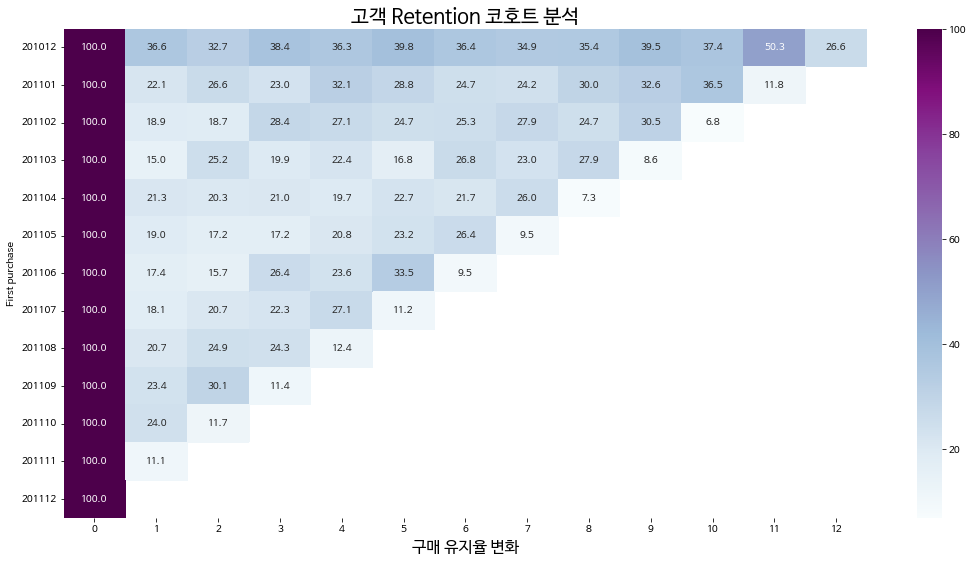

In [96]:
xlabel = [i for i in range(13)]
ylabel = df_copy['InvoiceMonth'].unique().tolist()

plt.figure(figsize=(18, 9))
sns.heatmap(retention_pivot, xticklabels = xlabel, yticklabels = ylabel, annot=True, fmt='.1f', cmap='BuPu')
plt.yticks(rotation=0) 
plt.xlabel('구매 유지율 변화', fontsize=16)
plt.title('고객 Retention 코호트 분석', fontsize=20)

데이터의 양이 모자른 2011년 12월을 제외하고,

**유저 구매 유지율**은 첫번째 코호트에서 11 기간이 경과했을 때까지 꾸준히 감소했다기 보다 평균적으로 **35%**를 기록하다가 12번째 달에 **50.3%**를 기록했습니다.

**이커머스 플랫폼**에서 구매를 확정 지은 이벤트를 기준으로 집계 했기 때문에 **사이트 방문** 코호트 분석은 아니지만,

고객 중 우리 서비스를 통해 물품 구매를 꾸준히 하는 비율을 알 수 있었습니다.